<a href="https://colab.research.google.com/github/Rjpiit/ML335_assignment3/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

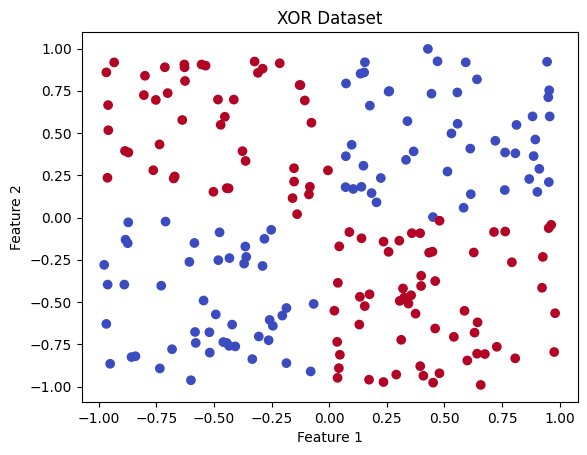

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


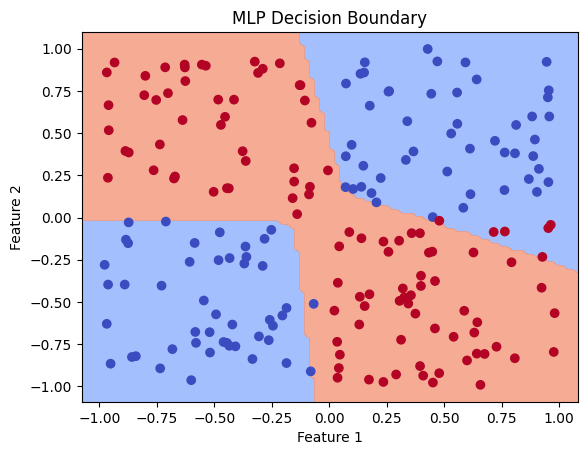

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


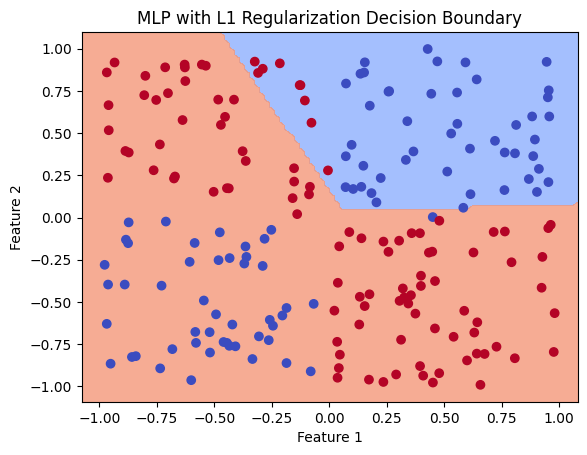

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


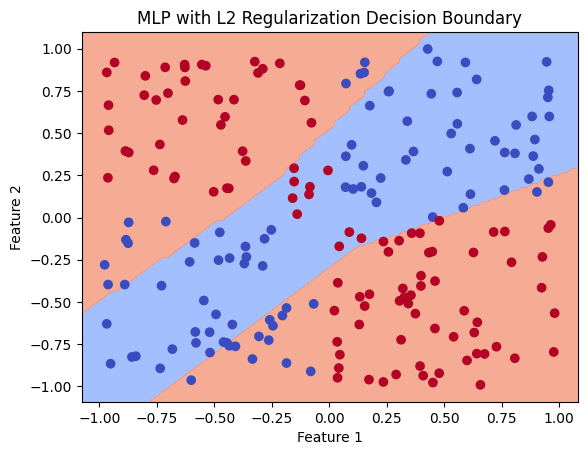

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


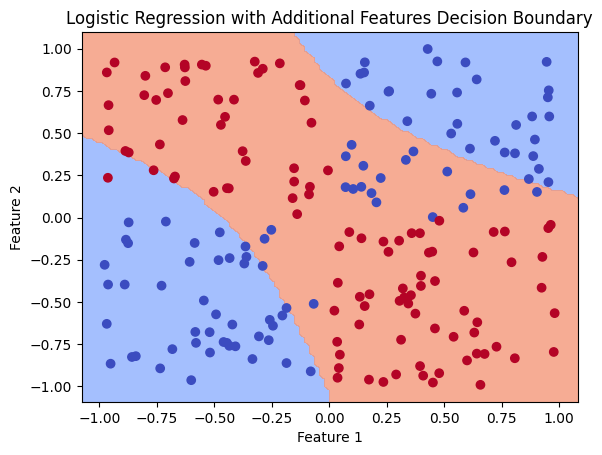

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate XOR dataset
np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1  # Generate random numbers between -1 and 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)  # XOR labels

X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Define MLP model
def create_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Train MLP model
mlp_model = create_mlp_model()
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_history = mlp_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plot decision boundary for MLP
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = mlp_model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('MLP Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Define MLP with L1 regularization model
def create_l1_regularized_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Train MLP with L1 regularization model
l1_regularized_mlp_model = create_l1_regularized_mlp_model()
l1_regularized_mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
l1_regularization_history = l1_regularized_mlp_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plot decision boundary for MLP with L1 regularization
Z = l1_regularized_mlp_model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('MLP with L1 Regularization Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Define MLP with L2 regularization model
def create_l2_regularized_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Train MLP with L2 regularization model
l2_regularized_mlp_model = create_l2_regularized_mlp_model()
l2_regularized_mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
l2_regularization_history = l2_regularized_mlp_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plot decision boundary for MLP with L2 regularization
Z = l2_regularized_mlp_model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('MLP with L2 Regularization Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Logistic regression with additional features
X_train_transformed = np.c_[X_train, X_train[:, 0] * X_train[:, 1], X_train[:, 0] ** 2, X_train[:, 1] ** 2]
X_test_transformed = np.c_[X_test, X_test[:, 0] * X_test[:, 1], X_test[:, 0] ** 2, X_test[:, 1] ** 2]

logistic_regression_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(5,))
])

logistic_regression_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
logistic_regression_history = logistic_regression_model.fit(X_train_transformed, y_train, epochs=100, validation_data=(X_test_transformed, y_test), verbose=0)

# Plot decision boundary for logistic regression with additional features
Z = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel() * yy.ravel(), xx.ravel() ** 2, yy.ravel() ** 2]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Logistic Regression with Additional Features Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


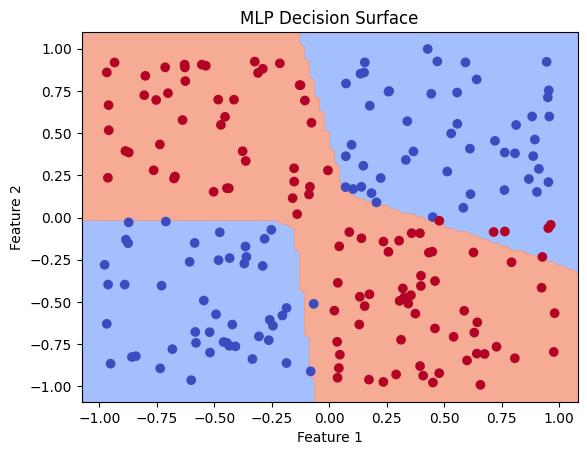

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


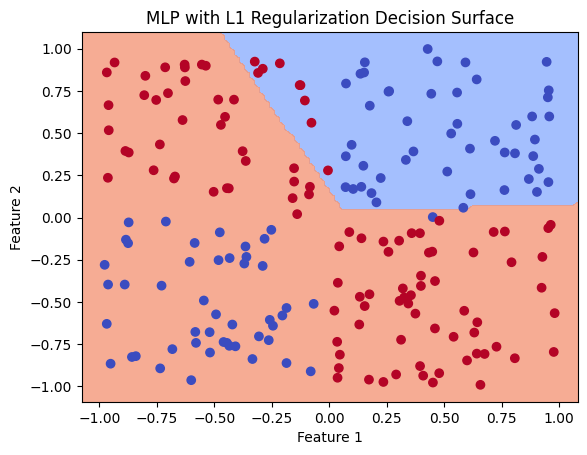

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


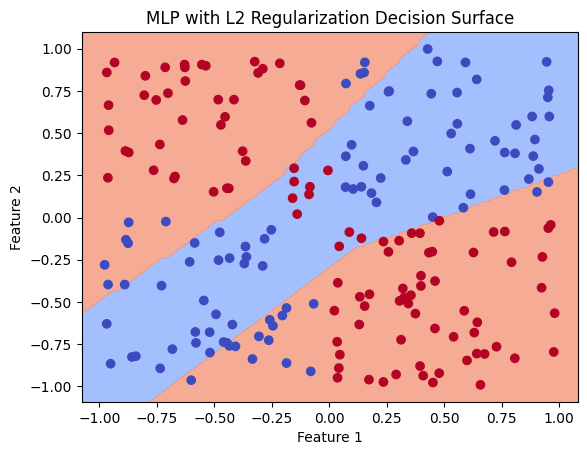

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


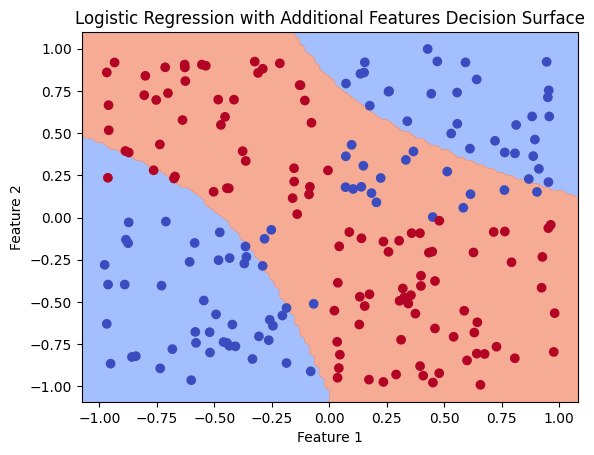

In [5]:
# Plot decision surface function
def plot_decision_surface(model, title):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision surface for MLP
plot_decision_surface(mlp_model, 'MLP Decision Surface')

# Plot decision surface for MLP with L1 regularization
plot_decision_surface(l1_regularized_mlp_model, 'MLP with L1 Regularization Decision Surface')

# Plot decision surface for MLP with L2 regularization
plot_decision_surface(l2_regularized_mlp_model, 'MLP with L2 Regularization Decision Surface')

# Plot decision surface for logistic regression with additional features
def plot_decision_surface_logistic_regression(model, title):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel() * yy.ravel(), xx.ravel() ** 2, yy.ravel() ** 2]) > 0.5
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_surface_logistic_regression(logistic_regression_model, 'Logistic Regression with Additional Features Decision Surface')
